In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import copy
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn import linear_model
from sklearn.ensemble import VotingRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RegressionData = pd.read_csv('final_dataframe newCode radius=2All.csv')
#RegressionData = pd.read_csv('output.csv')

RegressionData

,Business Name,Business Rating,Rating Class,FoodSubCategory,Surrounding Business Count of Different Category,Average rating in radius,Max rating in radius,Min rating in radius,Checkin in Different Category Surrounding Businesses,Same Category Business Count,...,GoodForKids,BikeParking,WiFi,reviewCountSameCat,reviewCountDiffCat,Parking,Entertainment&ShoppingCount,weighted_mean_SameSubCat,geohash,geohash_id
0,Sonic Drive-In,2.0,0,1,10,3.800000,5.0,2.0,108,9,...,1,0,0,186,83,0,5,1.551317,dn6n6,0
1,Sonic Drive-In,1.5,0,1,47,3.393617,5.0,1.0,916,17,...,1,1,0,964,1271,0,11,2.315183,dn6mc,1
2,Vietnamese Food Truck,4.0,2,0,623,3.813002,5.0,1.0,86798,126,...,1,1,1,20210,38880,0,180,3.898420,dhvr5,2
3,Denny's,2.5,0,0,199,3.379397,5.0,1.0,12015,57,...,1,0,0,3495,5273,1,108,3.732709,dp4c2,3
4,Tuna Bar,4.0,2,0,2038,3.770854,5.0,1.0,376951,479,...,0,1,1,112196,164827,1,781,3.951419,dr4e6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24422,Don Cruz Snowballs,4.5,2,0,91,3.445055,5.0,1.0,4731,34,...,1,1,1,2211,1851,1,36,3.858269,9vrff,301
24423,PrimoHoagies,3.0,1,0,334,3.868263,5.0,1.0,19984,66,...,1,1,0,9873,14971,1,109,3.582981,dr4e8,277
24424,Pizza Hut,3.0,1,1,107,3.509346,5.0,1.0,5816,35,...,0,1,0,2008,2860,0,37,3.367021,dn6mv,532
24425,Dutch Bros Coffee,4.0,2,0,315,3.468254,5.0,1.0,11275,59,...,1,1,1,4220,7107,1,151,3.545863,9rv21,137


In [3]:
RegressionData.describe()

,Business Rating,Rating Class,FoodSubCategory,Surrounding Business Count of Different Category,Average rating in radius,Max rating in radius,Min rating in radius,Checkin in Different Category Surrounding Businesses,Same Category Business Count,Checkin in Same Category Surrounding Businesses,...,RestaurantsGoodForGroups,GoodForKids,BikeParking,WiFi,reviewCountSameCat,reviewCountDiffCat,Parking,Entertainment&ShoppingCount,weighted_mean_SameSubCat,geohash_id
count,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,...,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000,24427.000000
mean,3.450935,1.219593,0.389528,282.040979,3.594057,4.981926,1.170099,38073.606378,68.420723,19742.610349,...,0.866009,0.945143,0.796537,0.556925,11033.895525,16794.666312,0.742457,105.073976,3.403458,299.686494
std,0.908768,0.791342,0.487653,522.811937,0.291449,0.136299,0.360377,101227.201249,117.673544,55911.620034,...,0.340650,0.227706,0.402582,0.496759,30327.547264,43804.144335,0.437290,195.163075,0.774892,235.102958
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,61.000000,3.400000,5.000000,1.000000,1927.000000,21.000000,1260.500000,...,1.000000,1.000000,1.000000,0.000000,963.500000,1222.000000,0.000000,20.000000,2.972875,97.000000
50%,3.500000,1.000000,0.000000,121.000000,3.611446,5.000000,1.000000,5825.000000,36.000000,3586.000000,...,1.000000,1.000000,1.000000,1.000000,2265.000000,3003.000000,1.000000,45.000000,3.543755,252.000000
75%,4.000000,2.000000,1.000000,242.000000,3.801050,5.000000,1.000000,19122.500000,60.000000,10404.000000,...,1.000000,1.000000,1.000000,1.000000,5724.000000,8604.000000,1.000000,95.000000,3.976490,475.000000
max,5.000000,2.000000,1.000000,3293.000000,5.000000,5.000000,5.000000,566806.000000,761.000000,311287.000000,...,1.000000,1.000000,1.000000,1.000000,176558.000000,255322.000000,1.000000,1238.000000,5.000000,1003.000000


In [4]:
#RegressionData = RegressionData.drop(RegressionData[RegressionData['Same Category Business Count'] < 2].index)
#RegressionData = RegressionData.drop(RegressionData[RegressionData['Surrounding Business Count of Different Category'] < 10].index)
#RegressionData = RegressionData.drop(RegressionData[RegressionData['Review Count'] < 10].index)

In [5]:
RegressionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24427 entries, 0 to 24426
Data columns (total 45 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Business Name                                         24427 non-null  object 
 1   Business Rating                                       24427 non-null  float64
 2   Rating Class                                          24427 non-null  int64  
 3   FoodSubCategory                                       24427 non-null  int64  
 4   Surrounding Business Count of Different Category      24427 non-null  int64  
 5   Average rating in radius                              24427 non-null  float64
 6   Max rating in radius                                  24427 non-null  float64
 7   Min rating in radius                                  24427 non-null  float64
 8   Checkin in Different Category Surrounding Businesses  24

In [6]:
import copy

data = copy.deepcopy(RegressionData)
del data['Business Name']
del data['City']
del data['State']
del data['latitude']
del data['longitude']
del data['geohash']
del data['Business Rating']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24427 entries, 0 to 24426
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Business Rating                                       24427 non-null  float64
 1   Rating Class                                          24427 non-null  int64  
 2   FoodSubCategory                                       24427 non-null  int64  
 3   Surrounding Business Count of Different Category      24427 non-null  int64  
 4   Average rating in radius                              24427 non-null  float64
 5   Max rating in radius                                  24427 non-null  float64
 6   Min rating in radius                                  24427 non-null  float64
 7   Checkin in Different Category Surrounding Businesses  24427 non-null  int64  
 8   Same Category Business Count                          24

In [ ]:
'Average rating in radius','DiffCatWeightedMean','Average rating in radius of same category','SameCatWeightedMean','weighted_mean_SameSubCat'

del data['dbscan_cluster_label']
del data['kmeans_cluster_label']
del data['neighborhood_id']
del data['WiFi']
del data['BikeParking']
del data['GoodForKids']
del data['RestaurantsGoodForGroups']
del data['HasTV']
del data['RestaurantsReservations']
del data['RestaurantsPriceRange2']
del data['OutdoorSeating']
del data['RestaurantsDelivery']
del data['RestaurantsTakeOut']
del data['BusinessAcceptsCreditCards']
del data['Review Count']

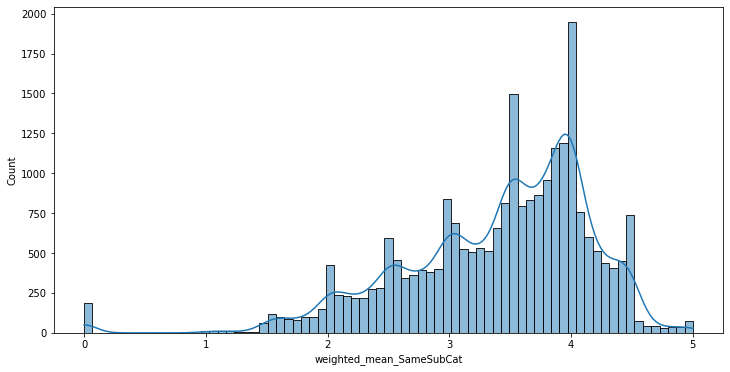

In [7]:
plt.figure(figsize = (12 ,6))
#sns.histplot(data = data, x = data['SameCatWeightedMean'], kde = True)
sns.histplot(data = data, x = data['weighted_mean_SameSubCat'], kde = True)
plt.show()

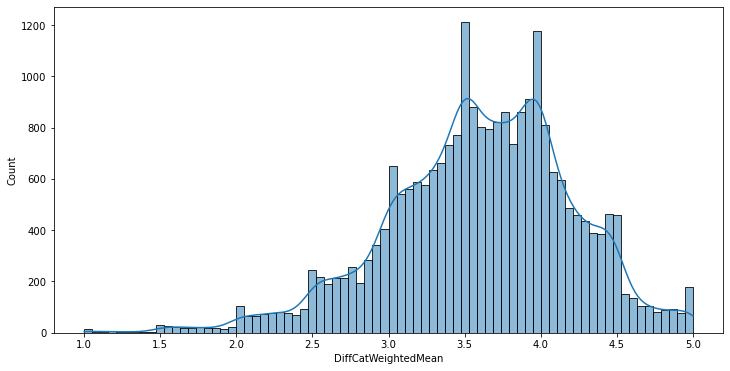

In [8]:
plt.figure(figsize = (12 ,6))
sns.histplot(data = data, x = data['DiffCatWeightedMean'], kde = True)
#sns.histplot(data = data, x = data['RestaurantsPriceRange2'], kde = True)
plt.show()

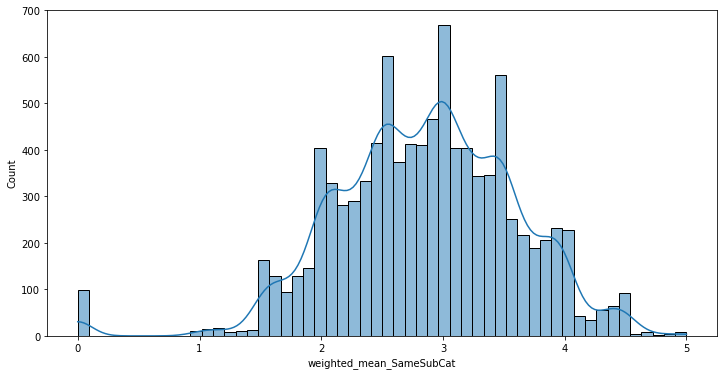

3.7544219731780744


In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data[data['FoodSubCategory'] == 1], x='weighted_mean_SameSubCat', kde=True)
plt.show()

average = data[data['FoodSubCategory'] == 0]['weighted_mean_SameSubCat'].mean()
print(average)

In [10]:
data.sample()

,Business Rating,Rating Class,FoodSubCategory,Surrounding Business Count of Different Category,Average rating in radius,Max rating in radius,Min rating in radius,Checkin in Different Category Surrounding Businesses,Same Category Business Count,Checkin in Same Category Surrounding Businesses,...,RestaurantsGoodForGroups,GoodForKids,BikeParking,WiFi,reviewCountSameCat,reviewCountDiffCat,Parking,Entertainment&ShoppingCount,weighted_mean_SameSubCat,geohash_id
18434,4.5,2,0,565,4.054867,5.0,1.0,79700,104,27999,...,1,1,1,1,16470,39305,0,205,4.279239,511


In [11]:
# Define a function to apply the transformation
def transform_rating_class(x):
    if x >= 4:
        return 2
    elif x >= 3:
        return 1
    else:
        return 0

# Apply the function to the rating class column
data['Rating Class'] = data['Business Rating'].apply(transform_rating_class)

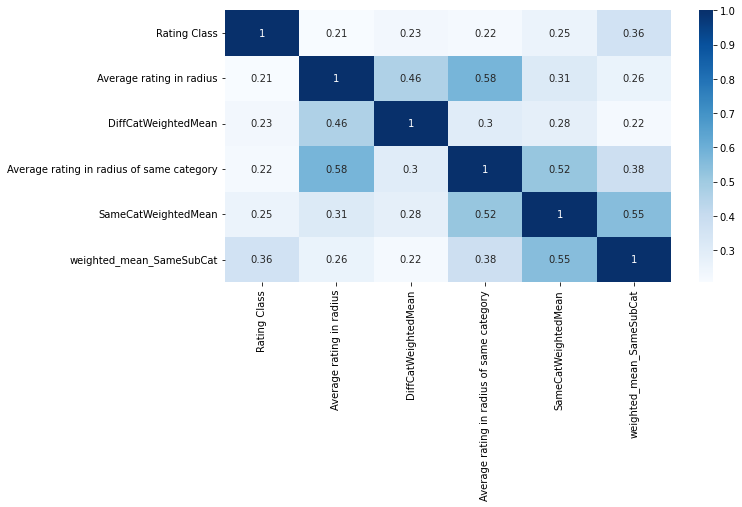

In [28]:
# Specify the columns you want to keep
columns_to_keep = ['Rating Class','Average rating in radius','DiffCatWeightedMean','Average rating in radius of same category','SameCatWeightedMean','weighted_mean_SameSubCat']

# Select the specified columns from the DataFrame
subset = data[columns_to_keep]

# Create the correlation heatmap with blues color palette
plt.figure(figsize=(10, 5))
sns.heatmap(subset.corr(), annot=True, cmap='Blues')
plt.show()


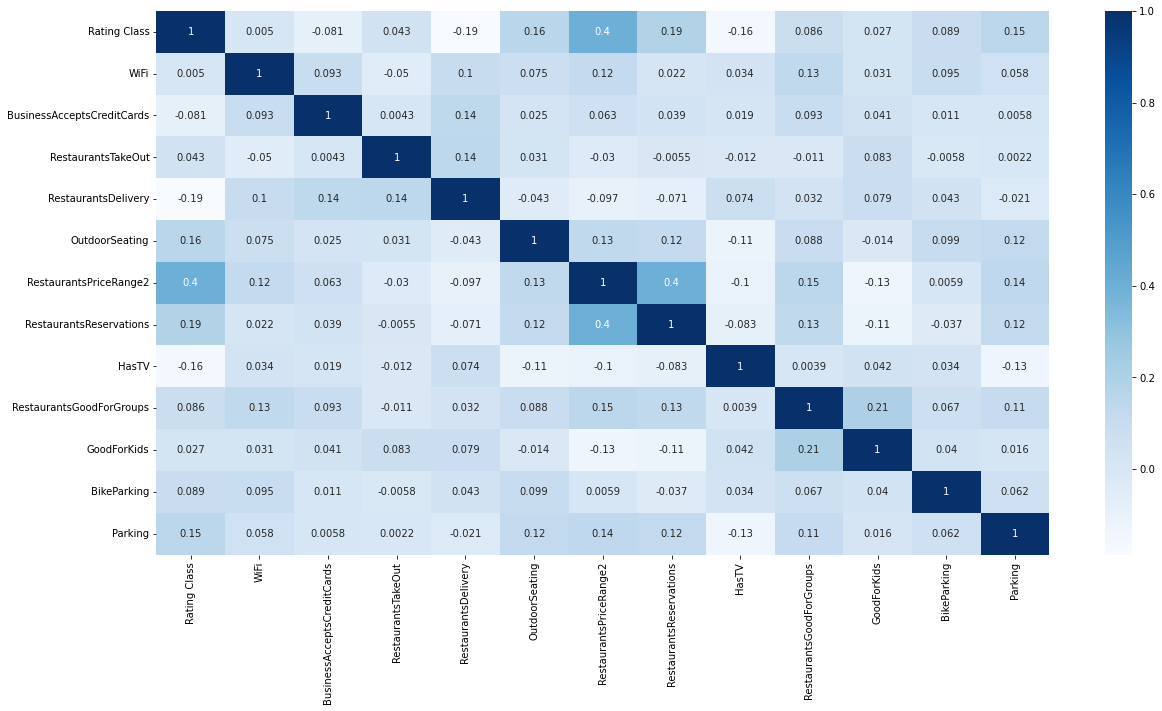

In [29]:
# Specify the columns you want to keep
columns_to_keep = ['Rating Class','WiFi','BusinessAcceptsCreditCards','RestaurantsTakeOut','RestaurantsDelivery','OutdoorSeating','RestaurantsPriceRange2','RestaurantsReservations','HasTV','RestaurantsGoodForGroups','GoodForKids','BikeParking','Parking']

# Select the specified columns from the DataFrame
subset = data[columns_to_keep]

# Create the correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(subset.corr(), annot=True, cmap='Blues')
plt.show()


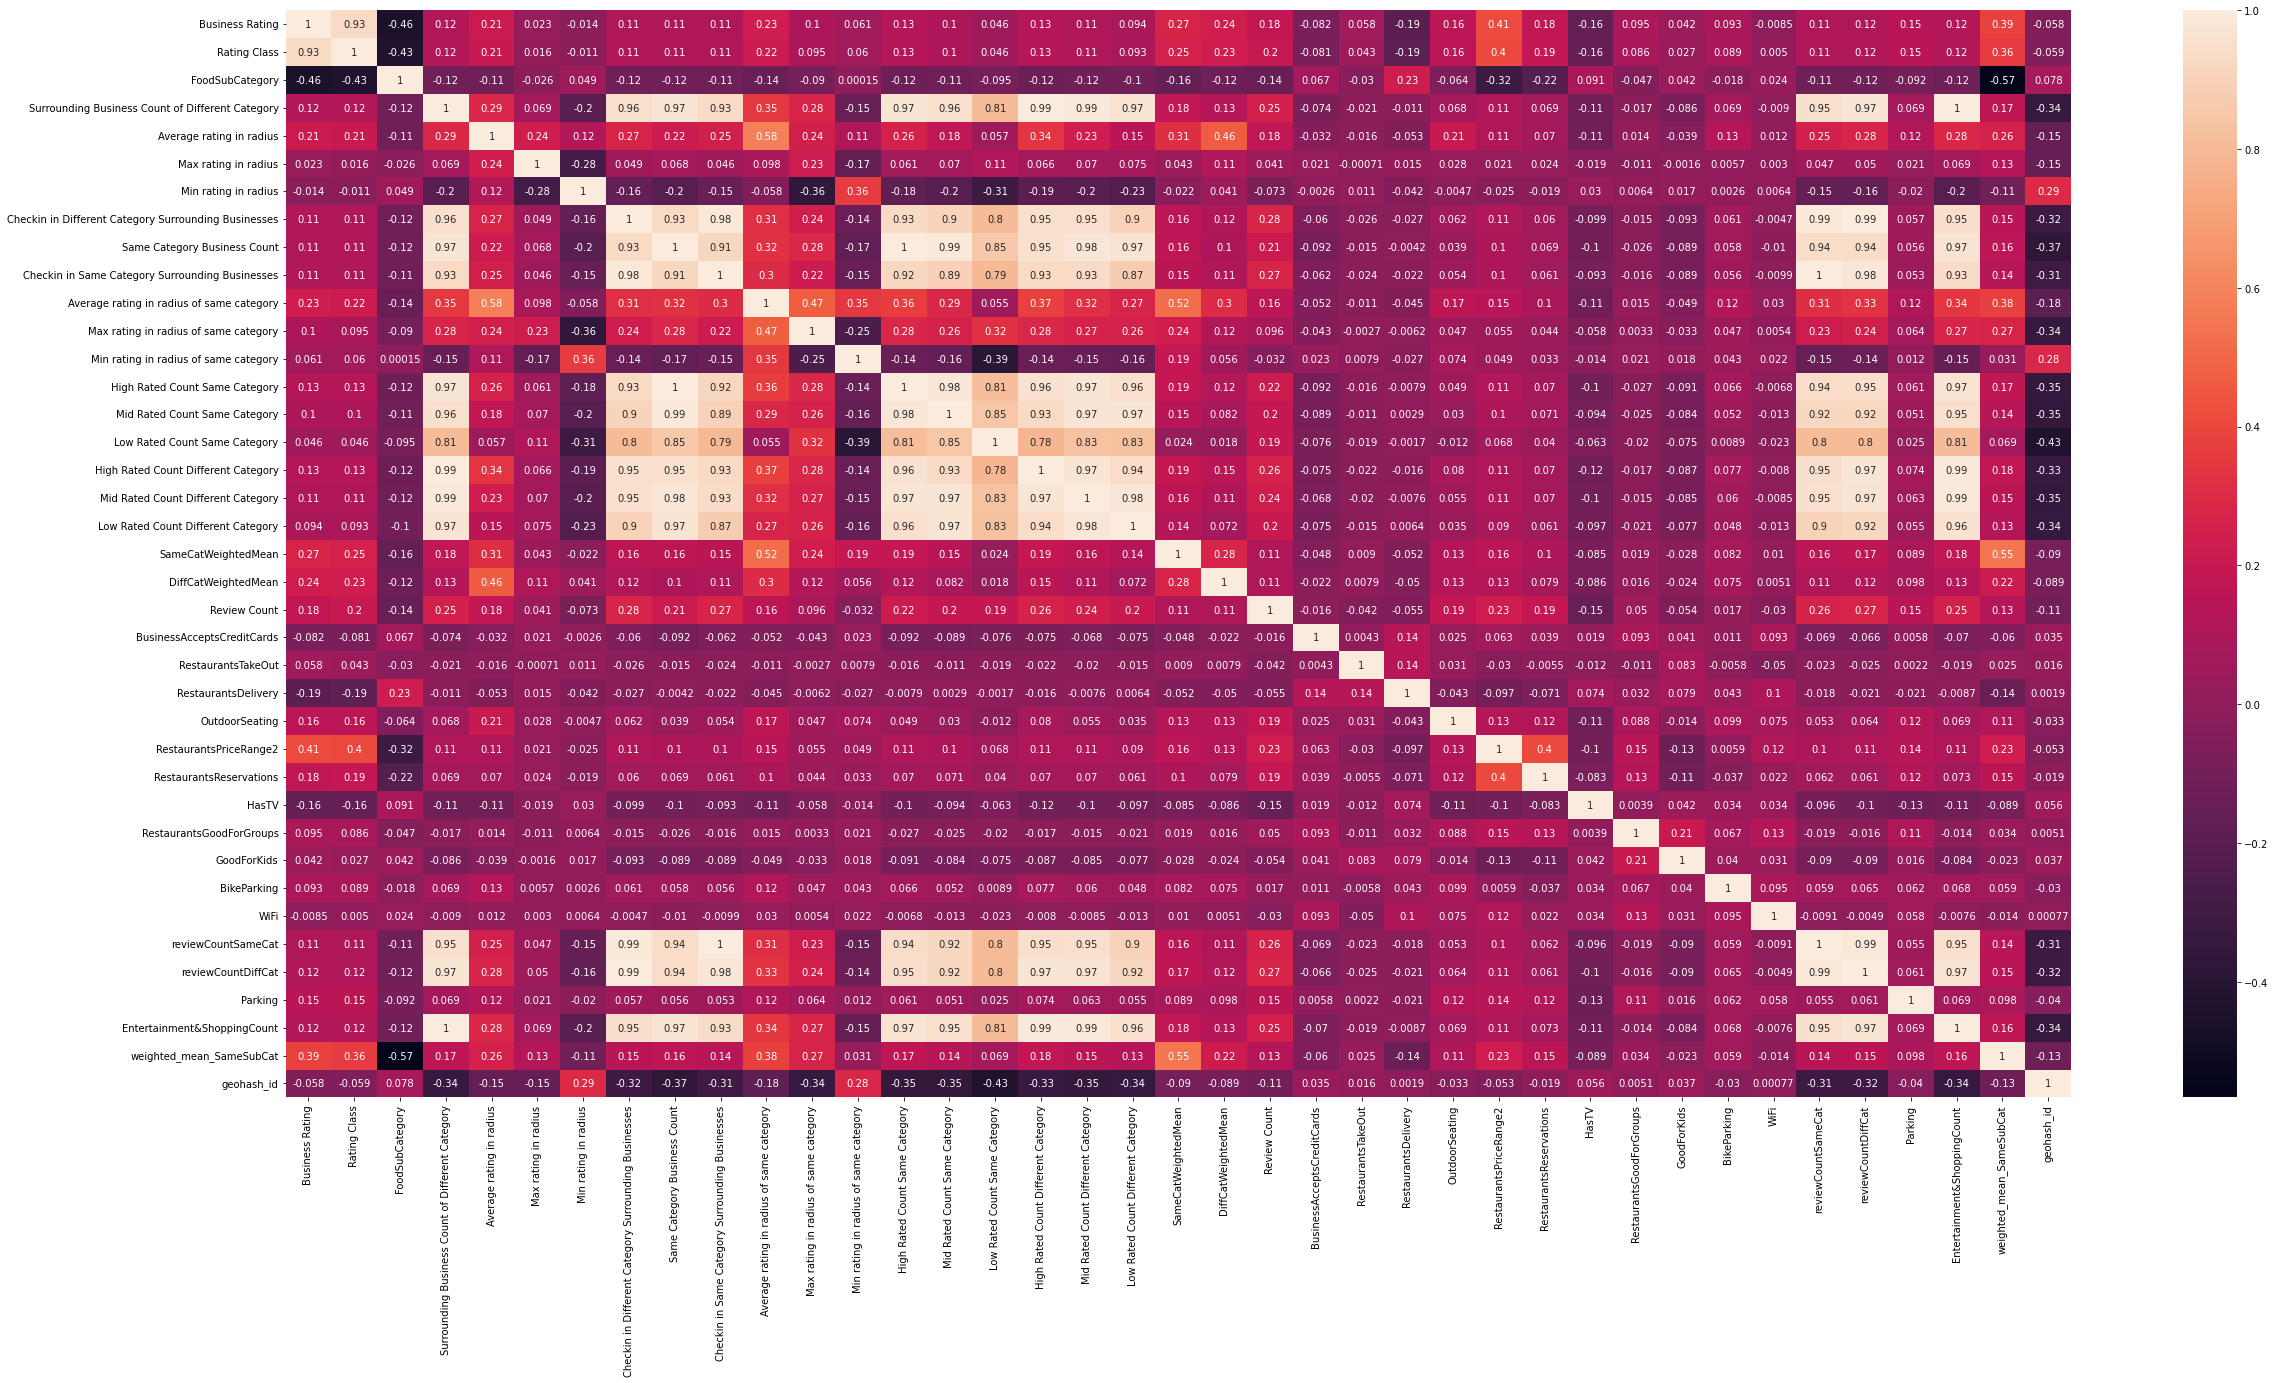

In [13]:
plt.figure(figsize = (40, 20))

sns.heatmap(data.corr(), annot = True)
plt.show()

In [14]:
#del data['kmeans_cluster_label']
#del data['neighborhood_id']
del data['Business Rating']
#del data['WiFi']
#del data['Min rating in radius']
#del data['Min rating in radius of same category']

In [15]:
# Separate Data columns and Target column

#Y = np.array(data['Business Rating'])
Y = np.array(data['Rating Class'])

#X = copy.deepcopy(data.drop('Business Rating', axis=1).copy())
X = copy.deepcopy(data.drop('Rating Class', axis=1).copy())

#print X

## Split Data

In [16]:
# Split Data in 75:25 Ratio of Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=412, stratify=Y)

print ("Shape of Training Data: \n" ,"Train X: ",X_train.shape,"\nTrain Y: " ,y_train.shape)
print ("\nShape of Testing Data: \n" ,"Train X: ",X_test.shape,"\nTrain Y: " ,y_test.shape)



Shape of Training Data: 
 Train X:  (18320, 37) 
Train Y:  (18320,)

Shape of Testing Data: 
 Train X:  (6107, 37) 
Train Y:  (6107,)


# Machine Learning Model Selection and Training

Accuracy of Random Forest Classifier: 67.97%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.62      0.67      1389
           1       0.60      0.53      0.56      1988
           2       0.70      0.82      0.76      2730

    accuracy                           0.68      6107
   macro avg       0.68      0.66      0.66      6107
weighted avg       0.68      0.68      0.67      6107



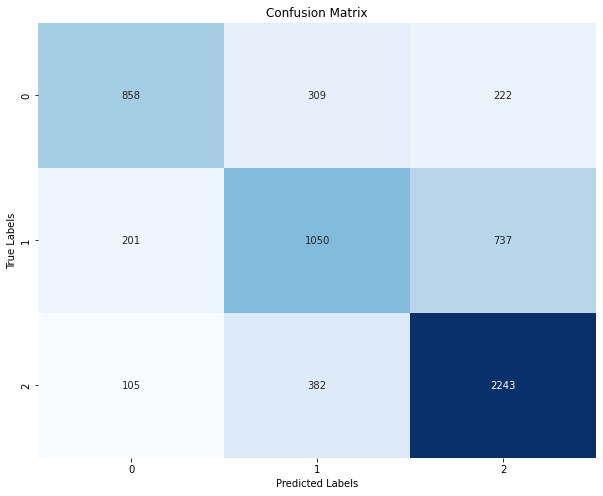

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=2021)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = rf_classifier.predict(X_test)

# Compute the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier: {:.2f}%".format(accuracy*100))

# Calculate precision, recall, and F1 score
classification_metrics = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", classification_metrics)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

FoodSubCategory: 0.049082074211838786
Surrounding Business Count of Different Category: 0.02856973330087553
Average rating in radius: 0.03975782804840258
Max rating in radius: 0.0009694307720766942
Min rating in radius: 0.005994331648764185
Checkin in Different Category Surrounding Businesses: 0.03373358626706857
Same Category Business Count: 0.028031083516774698
Checkin in Same Category Surrounding Businesses: 0.03315676803544272
Average rating in radius of same category: 0.03854032836288544
Max rating in radius of same category: 0.006812349664006908
Min rating in radius of same category: 0.010945546477078086
High Rated Count Same Category: 0.02765348129360457
Mid Rated Count Same Category: 0.026610891713712517
Low Rated Count Same Category: 0.02490951654959185
High Rated Count Different Category: 0.029185045629721938
Mid Rated Count Different Category: 0.027835490704786657
Low Rated Count Different Category: 0.028196657974636975
SameCatWeightedMean: 0.046282385001280534
DiffCatWeight

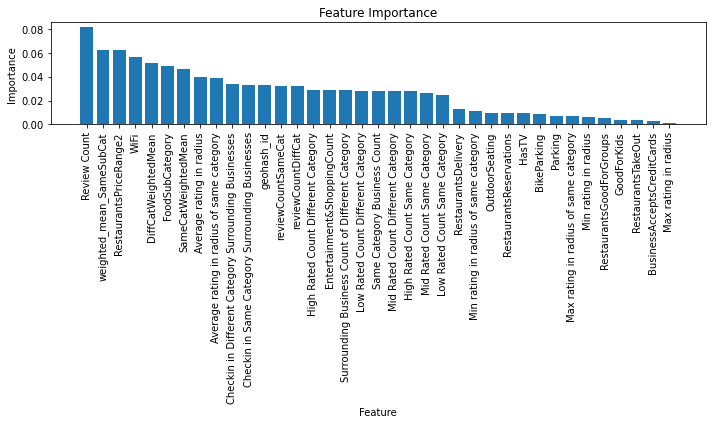

['Review Count', 'weighted_mean_SameSubCat', 'RestaurantsPriceRange2', 'WiFi', 'DiffCatWeightedMean', 'FoodSubCategory', 'SameCatWeightedMean', 'Average rating in radius', 'Average rating in radius of same category', 'Checkin in Different Category Surrounding Businesses', 'Checkin in Same Category Surrounding Businesses', 'geohash_id', 'reviewCountSameCat', 'reviewCountDiffCat', 'High Rated Count Different Category', 'Entertainment&ShoppingCount', 'Surrounding Business Count of Different Category', 'Low Rated Count Different Category', 'Same Category Business Count', 'Mid Rated Count Different Category', 'High Rated Count Same Category', 'Mid Rated Count Same Category', 'Low Rated Count Same Category', 'RestaurantsDelivery', 'Min rating in radius of same category', 'OutdoorSeating', 'RestaurantsReservations', 'HasTV', 'BikeParking', 'Parking', 'Max rating in radius of same category', 'Min rating in radius', 'RestaurantsGoodForGroups', 'GoodForKids', 'RestaurantsTakeOut', 'BusinessAccep

In [18]:
# Get the feature importances
importances = rf_classifier.feature_importances_

# Print the feature importances
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance}")
    
# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Print the list of features in order of importance
print(feature_importance_df['Feature'].tolist())

In [19]:
import pandas as pd

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Get the sorted list of features
sorted_features = feature_importance_df['Feature'].tolist()

# Create the LaTeX table code
latex_table = feature_importance_df.to_latex(index=False)

# Print the sorted list and the LaTeX table
print("Sorted Features:")
print(sorted_features)
print("\nLaTeX Table:")
print(latex_table)


Sorted Features:
['Review Count', 'weighted_mean_SameSubCat', 'RestaurantsPriceRange2', 'WiFi', 'DiffCatWeightedMean', 'FoodSubCategory', 'SameCatWeightedMean', 'Average rating in radius', 'Average rating in radius of same category', 'Checkin in Different Category Surrounding Businesses', 'Checkin in Same Category Surrounding Businesses', 'geohash_id', 'reviewCountSameCat', 'reviewCountDiffCat', 'High Rated Count Different Category', 'Entertainment&ShoppingCount', 'Surrounding Business Count of Different Category', 'Low Rated Count Different Category', 'Same Category Business Count', 'Mid Rated Count Different Category', 'High Rated Count Same Category', 'Mid Rated Count Same Category', 'Low Rated Count Same Category', 'RestaurantsDelivery', 'Min rating in radius of same category', 'OutdoorSeating', 'RestaurantsReservations', 'HasTV', 'BikeParking', 'Parking', 'Max rating in radius of same category', 'Min rating in radius', 'RestaurantsGoodForGroups', 'GoodForKids', 'RestaurantsTakeOut

C:\Users\Mughees\AppData\Local\Temp\ipykernel_15296\1574279287.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = feature_importance_df.to_latex(index=False)


Accuracy of XG Boost: 67.89%
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.66      0.68      1389
           1       0.59      0.56      0.57      1988
           2       0.72      0.78      0.75      2730

    accuracy                           0.68      6107
   macro avg       0.67      0.66      0.67      6107
weighted avg       0.68      0.68      0.68      6107



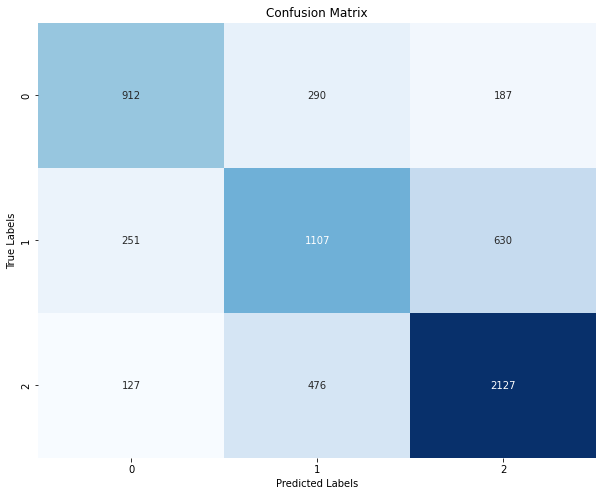

In [20]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Compute the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of XG Boost: {:.2f}%".format(accuracy*100))

# Calculate precision, recall, and F1 score
classification_metrics = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", classification_metrics)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Accuracy of XG Boost: 44.70%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      1389
           1       1.00      0.00      0.00      1988
           2       0.45      1.00      0.62      2730

    accuracy                           0.45      6107
   macro avg       0.82      0.33      0.21      6107
weighted avg       0.75      0.45      0.28      6107



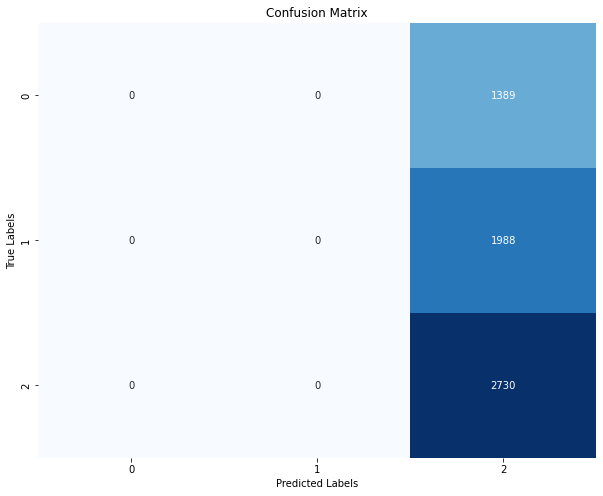

In [21]:
from sklearn import svm

# Create an instance of the SVC classifier
clf = svm.SVC(kernel='rbf')

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Compute the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of XG Boost: {:.2f}%".format(accuracy*100))

# Calculate precision, recall, and F1 score
classification_metrics = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", classification_metrics)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68      1389
           1       0.60      0.56      0.58      1988
           2       0.72      0.80      0.76      2730

    accuracy                           0.69      6107
   macro avg       0.68      0.67      0.67      6107
weighted avg       0.68      0.69      0.68      6107



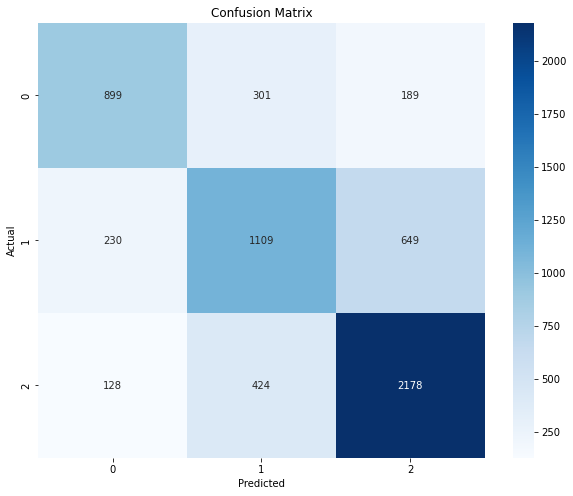

Accuracy: 0.6854429343376454
Precision: 0.6806775511840781
Recall: 0.6676258340131428
F1-score: 0.6726444248530007


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

# Initialize and train the LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1 score
classification_metrics = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", classification_metrics)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# LazyClassifier

In [23]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the classifier on the training data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


 86%|██████████████████████████████████████████████████████████████████████▋           | 25/29 [03:15<00:31,  7.84s/it]


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Extract the balanced accuracy scores from the results
balanced_accuracy = models['Balanced Accuracy']

# Generate the bar plot
balanced_accuracy.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Model')
plt.ylabel('Balanced Accuracy')
plt.title('Model Performance - Balanced Accuracy')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('lazy_accuracy.png')

# Print the balanced accuracy scores
print(balanced_accuracy)


In [ ]:
predictions